##**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Importing Data and Getting Info about Data**

In [3]:
df=pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df.shape

(8790, 10)

The dataset "netflix1.csv" comprises 8,790 entries, each representing a unique show available on Netflix. The data includes 10 key columns: show_id, type, title, director, country, date_added, release_year, rating, duration, and listed_in.

These columns provide comprehensive information about each show, including its unique identifier, type (Movie or TV Show), title, director, country of origin, the date it was added to Netflix, release year, rating, duration, and genres or categories it falls under.

##**Handling Missing Values**

In [6]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [7]:
df.duplicated().sum()

0

There are no missing values and duplicated data in the dataset.

##**Cleaning the Data**

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [9]:
df.rename(columns={'date_added':'Date',"listed_in":"category"},inplace=True)
df.head(2)

,show_id,type,title,director,country,Date,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   Date          8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [11]:
df.describe()

,Date,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [12]:
earliest_release_year  = df['release_year'].min()
latest_release_year  = df['release_year'].max()

print("earliest_release_year :", earliest_release_year)
print("latest_release_year:", latest_release_year)

earliest_release_year : 1925
latest_release_year: 2021


The movies and TV shows in the dataset have release years ranging from 1925 to 2021

In [13]:
earliest_date = df['Date'].min()
latest_date = df['Date'].max()

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2008-01-01 00:00:00
Latest Date: 2021-09-25 00:00:00


The dataset includes Netflix content added between January 1, 2008, and September 25, 2021

##**Distribution of the 'Type' Column - Movies vs TV Shows**


In [14]:
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


The dataset contains 6126 movies and 2664 TV shows

<ipython-input-15-a24ca4b13f5b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, ax=ax1, palette=['green', 'lightgreen'])


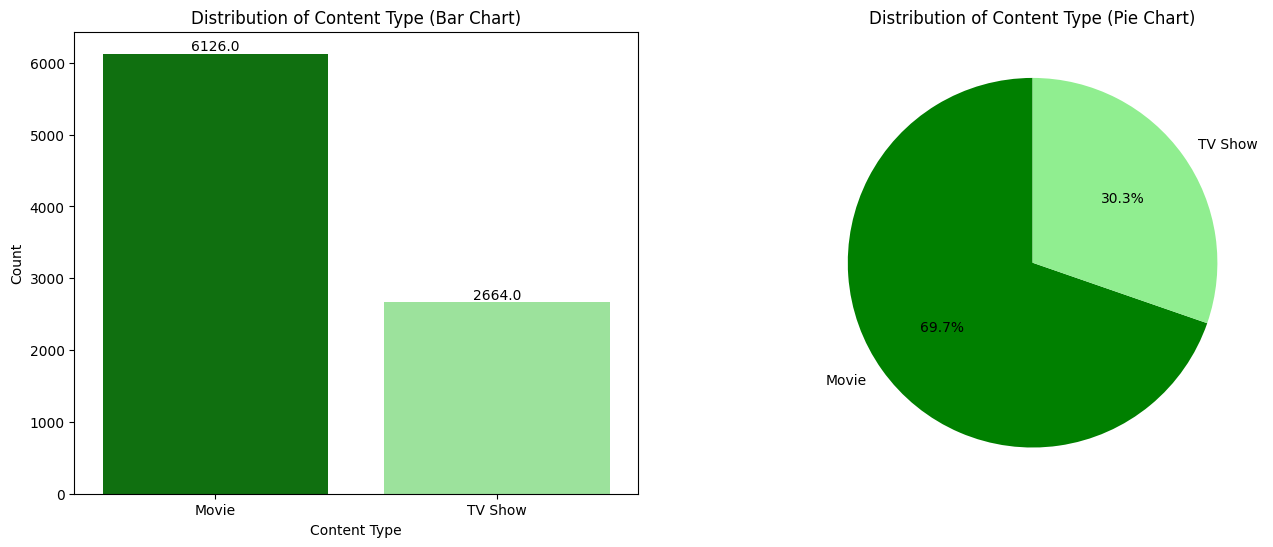

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
sns.countplot(x='type', data=df, ax=ax1, palette=['green', 'lightgreen'])
ax1.set_title('Distribution of Content Type (Bar Chart)')
ax1.set_xlabel('Content Type')
ax1.set_ylabel('Count')

# Add value labels on top of bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart
type_counts = df['type'].value_counts()
ax2.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'lightgreen'])
ax2.set_title('Distribution of Content Type (Pie Chart)')

plt.show()

The chart illustrates the distribution of content types, comparing Movies and TV Shows:

* Movies: Represent a significant portion, making up 69.7% of the total content.
* TV Shows: Account for the remaining 30.3%.

This visual representation highlights that Movies are more prevalent than TV Shows.

##**Visual Representation of Rating Frequency of Movies and TV Shows**

In [16]:
df['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


The table shows that the most common rating is TV-MA with 3205 entries, indicating a large amount of content is intended for mature audiences. On the other hand, NC-17 and UR have the least entries, with only 3 each.

<ipython-input-17-8121dcc1697e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df[df['type'] == 'Movie'], ax=axes[0], palette='Greens_d')
<ipython-input-17-8121dcc1697e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df[df['type'] == 'TV Show'], ax=axes[1], palette='Blues_d')


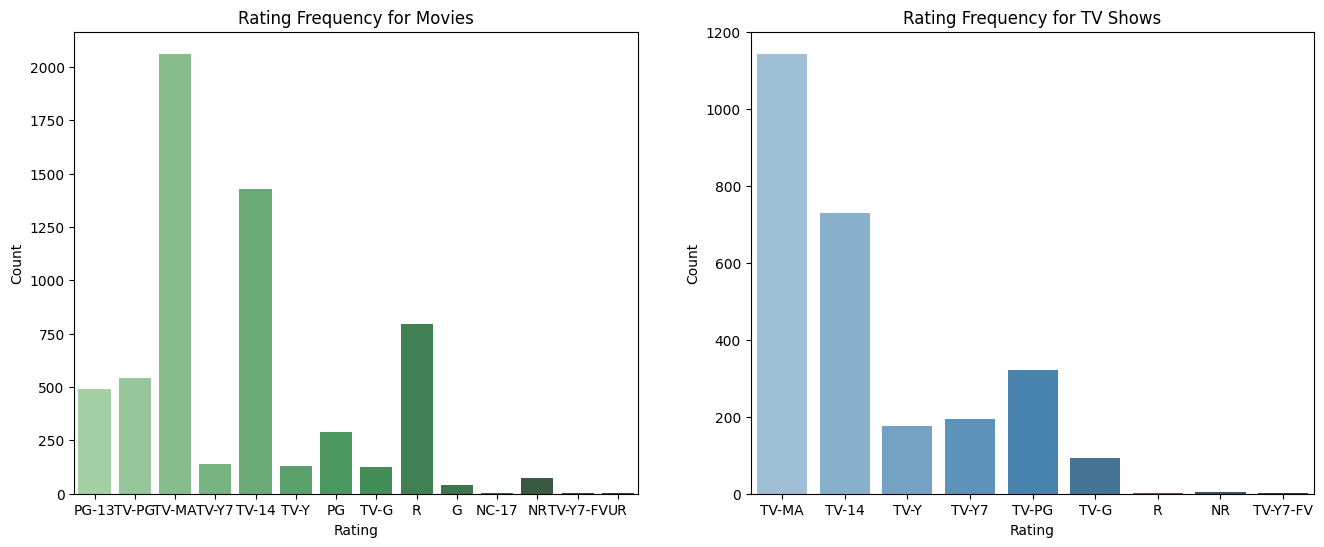

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Rating frequency for movies
sns.countplot(x='rating', data=df[df['type'] == 'Movie'], ax=axes[0], palette='Greens_d')
axes[0].set_title('Rating Frequency for Movies')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')

# Rating frequency for TV shows
sns.countplot(x='rating', data=df[df['type'] == 'TV Show'], ax=axes[1], palette='Blues_d')
axes[1].set_title('Rating Frequency for TV Shows')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')

plt.show()

* Rating Frequency for Movies

In this graph, TV-MA has the highest count, with nearly 2000 movies. It indicates content suitable for mature audiences only.

* Rating Frequency for TV Shows

In this graph, TV-MA has the highest count, with nearly 1200 TV shows showing it is the most common rating for TV shows in this dataset.

Key Insights

The most frequent rating is TV-MA, for both Movies and TV shows, indicating a large amount of content is intended for mature audiences.

These graphs provide a clear visual comparison of how movies and TV shows are distributed across different content rating categories.

<ipython-input-18-0b8720f844ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis')


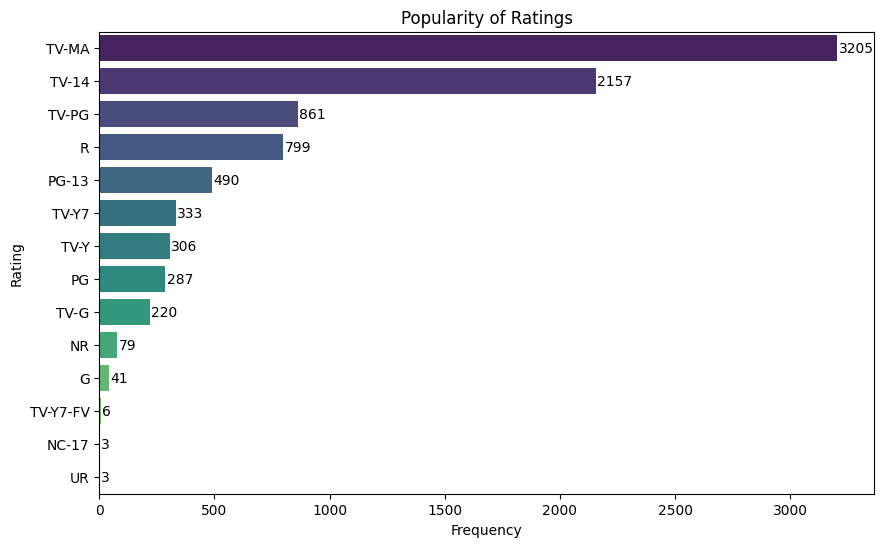

In [18]:
# Calculate rating counts
rating_counts = df['rating'].value_counts()

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis')
plt.title('Popularity of Ratings')
plt.xlabel('Frequency')
plt.ylabel('Rating')

# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5,  # Adjust horizontal position
             p.get_y() + p.get_height() / 2,  # Adjust vertical position
             '{:1.0f}'.format(width),  # Format label
             ha='left', va='center')  # Alignment

plt.show()

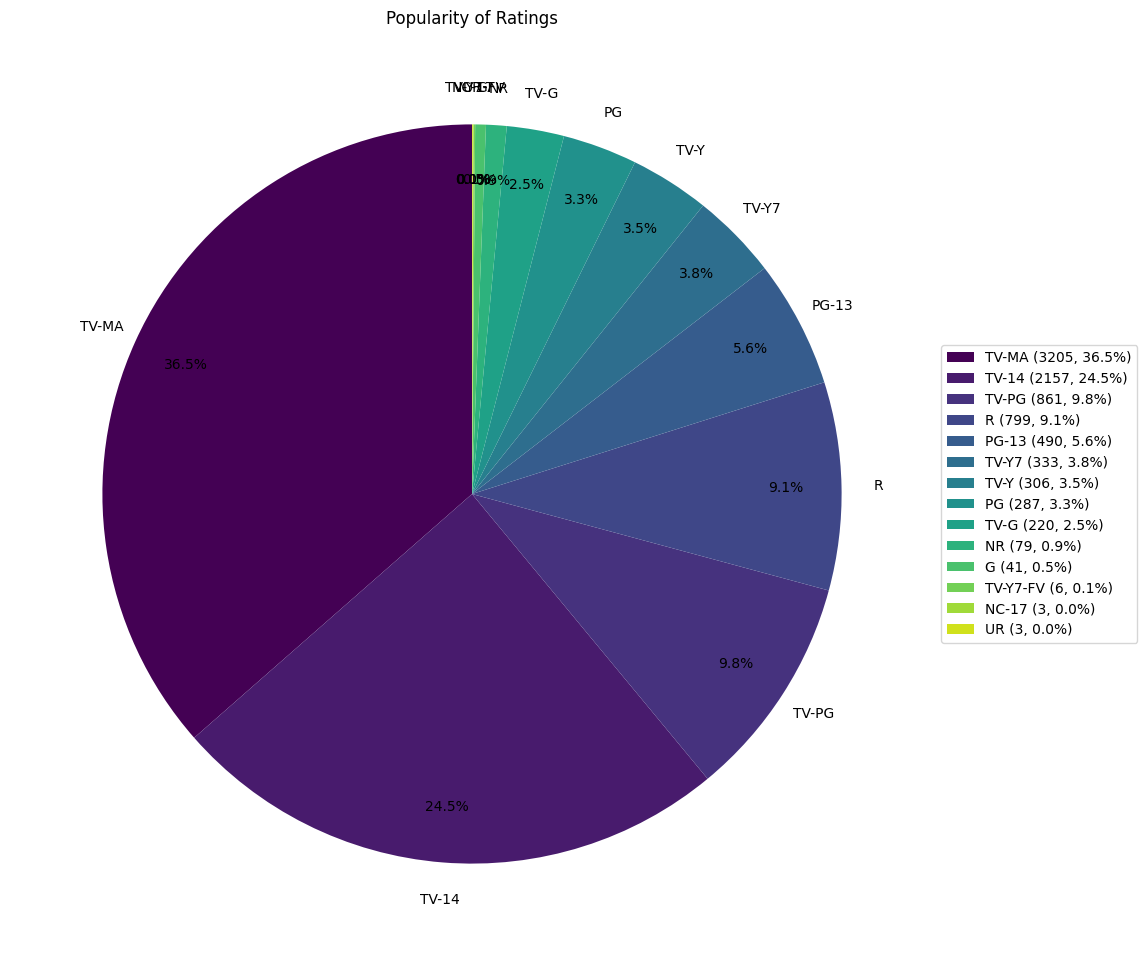

In [19]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(12, 12))  # Increased figure size for better label placement

wedges, texts, autotexts = plt.pie(rating_counts, labels=None,  # Remove labels from inside
                                  autopct='%1.1f%%', startangle=90,
                                  colors=plt.cm.viridis(np.arange(len(rating_counts)) / len(rating_counts)),
                                  pctdistance=0.85)  # Adjust pctdistance for better spacing

# Create a legend with labels, values, and percentages
legend_labels = [f'{label} ({value}, {percent:.1f}%)'
                  for label, value, percent in zip(rating_counts.index,
                                                  rating_counts.values,
                                                  rating_counts.values / rating_counts.sum() * 100)]
plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Add labels outside the circle
plt.gca().set_aspect('equal')  # Ensure the pie is circular
for i, wedge in enumerate(wedges):
    # Get the label and adjust position
    label = rating_counts.index[i]
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle)) * 1.1  # Adjust distance from the center
    y = np.sin(np.deg2rad(angle)) * 1.1

    # Add the label outside the pie
    plt.text(x, y, label, ha='center', va='center')

plt.title('Popularity of Ratings')
plt.show()

The “Popularity of Ratings” graph shows the frequency of TV shows and Movies ratings.

*  TV-MA: This rating has the highest count, with
3205 instances. It indicates content suitable for mature audiences only.
*  TV-14: The second highest, with 2157 instances. This rating is for content that parents are strongly cautioned about for children under 14.
*  R: The third highest, with 861 instances. This rating is for restricted content, requiring viewers under 17 to have an accompanying parent or adult guardian.
*  PG-13: This rating has 490 instances, indicating content that parents are strongly cautioned about for children under 13.
*  PG: This rating has 287 instances, suggesting parental guidance is recommended.
*  TV-Y7: Suitable for children age 7 and older, with 333 instances.
*  TV-G: General audience, suitable for all ages, with 220 instances.
*  NR (Not Rated): Content that hasn’t been rated, with 79 instances.
*  G: General audiences, with 41 instances.
*  NC-17: No one 17 and under admitted, with 3 instances.
*  TV-Y7-FV (Fantasy Violence): Suitable for children age 7 and older with fantasy violence, with 6 instances.
*  UR (Unrated): Content that hasn’t been rated, with 3 instances.

This graph provides insight into the prevalence of different TV show ratings within the dataset, highlighting that mature content (TV-MA) is the most common.

##**Top 10 Countries with Most Content on Netflix**

In [20]:
df['country'].value_counts().head(10)

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
Canada,271
Japan,259
South Korea,214
France,213


<ipython-input-21-f9a308ec2811>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="viridis")


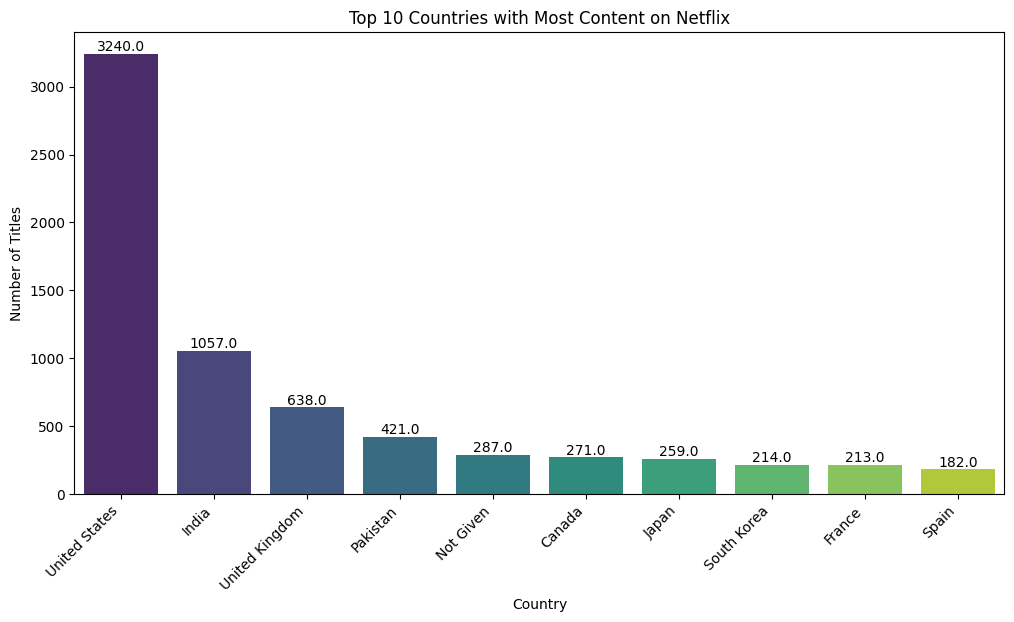

In [21]:
# Extract countries and count occurrences
country_counts = df['country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Create a bar plot with labels on top
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="viridis")
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

The table lists various countries along with the count of occurrences for each.
*   The United States has the highest count with 3240 occurrences.
*  Following the United States, India has 1057 occurrences, and the United Kingdom has 638.
*  Pakistan comes next with 421 occurrences.
*  There is also a category labeled Not Given, which likely indicates unspecified data, with a count of 287.
*  Canada has 271 occurrences, while Japan has 259. South Korea and France have similar counts, with 214 and 213 respectively.
*  Spain has the lowest count among the listed countries, with 182 occurrences.

##**Monthly Releases of Movies and TV shows on Netflix**


In [22]:
# Extract month and year from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by year, month, and type, then count releases for each type
monthly_releases = df.groupby(['Month', 'type'])['type'].count().reset_index(name='Count')

# Pivot the table to have months as columns and types as rows
table = monthly_releases.pivot_table(index=['type'], columns='Month', values='Count', fill_value=0)

# Display the table
table

Month,1,2,3,4,5,6,7,8,9,10,11,12
type,,,,,,,,,,,,
Movie,545.0,382.0,528.0,549.0,439.0,492.0,565.0,518.0,518.0,545.0,498.0,547.0
TV Show,192.0,180.0,213.0,214.0,193.0,236.0,262.0,236.0,251.0,215.0,207.0,265.0


*  Movies: The number of movies fluctuates throughout the year, with the highest count in July (565) and the lowest in February (382).
*  TV Shows: The number of TV shows also varies, with the highest count in December (265) and the lowest in February (180).

This table provides a clear view of how the availability of Movies and TV Shows changes month by month.



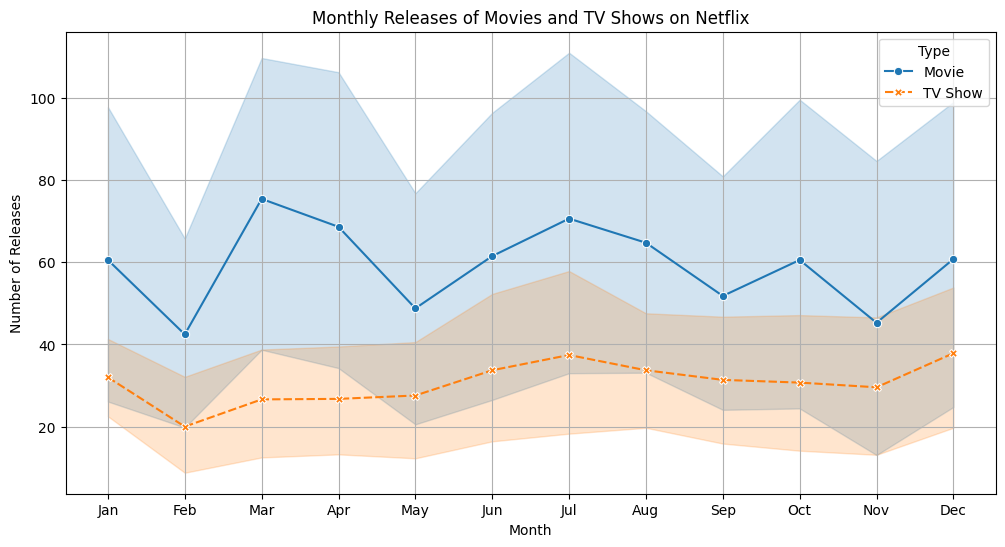

In [23]:
# Group by month and year, then count releases for each type
monthly_releases = df.groupby(['Year', 'Month', 'type'])['type'].count().reset_index(name='Count')

# Create a line plot with grids
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_releases, x='Month', y='Count', hue='type', style='type', markers=True)
plt.title('Monthly Releases of Movies and TV Shows on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Type')

# Add grids
plt.grid(True)

plt.show()

This graph provides a visual representation of content release patterns on Netflix over a year.

Monthly Trends:
*  January: Both movies and TV shows have a good number of releases.
*  February to April: There is a noticeable decrease in the number of movie releases in February, and started peaking in March.
*  May to July: The number of movie releases increases and peaks in July. TV show releases also increase during this period.
*  August: Both movies and TV shows see a slight dip in releases.
* July : Both Movies and TV shows peaked during this month.
*  September to November: The number of releases for both movies and TV shows increases, with a peak in October.
*  December: There is a slight increase in releases for both movies and TV shows after a dip in November.

Insights:

*  Movies: The highest number of movie releases occurs in April, while the lowest is in August.
*  TV Shows: The highest number of TV show releases occurs in October, while the lowest is in January.


##**Yearly Releases of Movies and TV Shows on Netflix**

In [24]:
# Group by year and type, then count releases for each type
yearly_releases = df.groupby(['Year', 'type'])['type'].count().reset_index(name='Count')

# Pivot the table to have years as rows and types as columns
yearly_releases_table = yearly_releases.pivot_table(index='type', columns='Year', values='Count', fill_value=0)

# Display the table
yearly_releases_table

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1.0,2.0,1.0,13.0,3.0,6.0,19.0,56.0,251.0,836.0,1237.0,1424.0,1284.0,993.0
TV Show,1.0,0.0,0.0,0.0,0.0,5.0,5.0,26.0,175.0,349.0,411.0,592.0,595.0,505.0


Key Insights:

*  Movies: The number of movies shows a significant increase over the years, starting from just 1.0 in 2008 and peaking at 1424.0 in 2019. There is a slight decrease in the following years, with 993.0 movies in 2021.
* TV Shows: The number of TV shows starts at 1.0 in 2008, remains at 0.0 from 2009 to 2012, and then begins to increase from 2013 onwards. The highest number of TV shows is 595.0 in 2020, with a slight decrease to 505.0 in 2021.

Trends:

* Overall Growth: Both movies and TV shows have shown a general upward trend in numbers over the years, indicating an increase in content production or availability.
* Peak Years: For movies, the peak year is 2019, while for TV shows, it is 2020.
* Recent Decline: Both categories show a slight decline in the most recent years (2020-2021), which could be due to various factors such as changes in production, distribution, or external influences like the global pandemic.


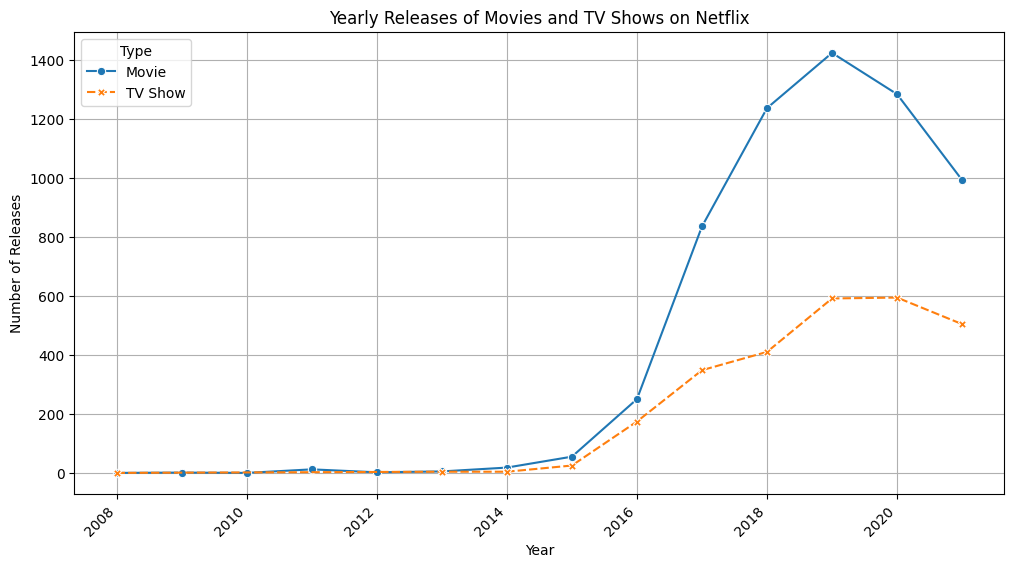

In [25]:
# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_releases, x='Year', y='Count', hue='type', style='type', markers=True)
plt.title('Yearly Releases of Movies and TV Shows on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.legend(title='Type')
plt.grid(True) # Add a grid for better visualization
plt.show()

This graph provides a clear visual representation of the growth and changes in Netflix’s content releases over the years. Here is a detailed analysis of “Yearly Releases of Movies and TV Shows on Netflix”:

Key Points:

1. Overall Trend:
* Both movies and TV shows show an increasing trend in the number of releases from 2008 to 2020.

2. Movies:
* 2008-2012: The number of movie releases starts low and increases gradually.
* 2013-2016: There is a significant rise in movie releases, with a sharp increase starting around 2015.
* 2017-2019: The number of releases peaks in 2019, reaching over 1400 releases.
* 2020: There is a noticeable decline in movie releases after 2019.

3. TV Shows:
* 2008-2012: The number of TV show releases remains relatively low and stable.
* 2013-2016: There is a gradual increase in TV show releases, with a more noticeable rise starting around 2015.
* 2017-2019: The number of releases continues to increase, peaking at around 600 releases in 2019.
* 2020: There is a slight decline in TV show releases after 2019, but it is less pronounced compared to movies.

4. Peak Years:
* Movies: The peak year for movie releases is 2019.
* TV Shows: The peak year for TV show releases is also 2019.

5. Decline in 2020:
Both movies and TV shows experience a decline in releases in 2020, with movies showing a sharper decline compared to TV shows.

Insights:

* Growth Period: Both movies and TV shows experienced significant growth in releases from 2013 to 2019.
* Impact of 2020: The decline in 2020 could be attributed to various factors, such as changes in production schedules, distribution strategies, or external influences like the global pandemic.
* Content Strategy: The data suggests that Netflix has been heavily investing in increasing its content library, particularly from 2013 onwards, with a focus on both movies and TV shows.

##**Top 10 Genres Most Frequently Listed in the Category Column**

In [26]:
# Assuming your DataFrame is named 'df'
# Split the 'listed_in' column by comma and explode to get individual genres
genre_counts = df['category'].str.split(', ').explode().value_counts()

# Get the top N most frequent genres (e.g., top 10)
top_genres = genre_counts.head(10)

top_genres

,count
category,
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1349
Documentaries,869
Action & Adventure,859
TV Dramas,762
Independent Movies,756
Children & Family Movies,641


<ipython-input-27-a962b59dce73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")  # Use 'viridis' or any other color palette


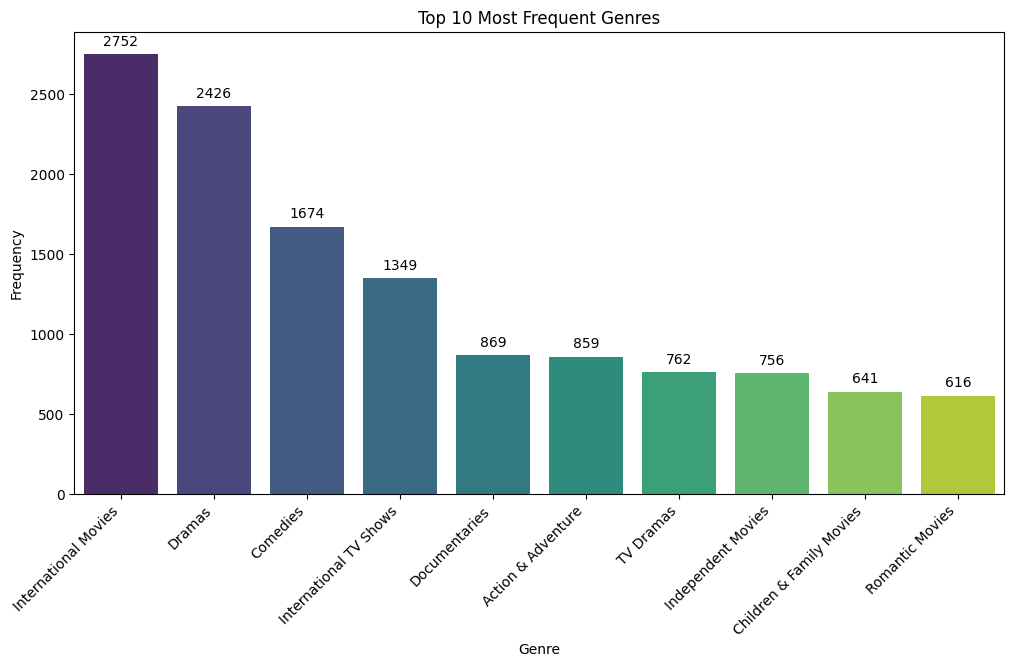

In [27]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")  # Use 'viridis' or any other color palette
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Set rotation to 45 degrees and horizontal alignment to 'right'
# Iterate through the patches (bars) and annotate with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

Key Insights:

* Most Common Category: International Movies have the highest count with 2752 titles, indicating a strong presence of global content.
* Dramas: The second most common category with 2426 titles, showing a high demand for dramatic content.
* Comedies: With 1674 titles, comedies are also a popular category, reflecting the audience’s preference for lighter, humorous content.
* International TV Shows: There are 1349 titles, highlighting the diversity and global reach of TV content.
* Documentaries and Action & Adventure: Both categories have substantial counts (869 and 859 respectively), indicating a balanced interest in factual content and thrilling adventures.
* TV Dramas and Independent Movies: These categories have similar counts (762 and 756), showing a niche but significant audience.
* Children & Family Movies: With 641 titles, this category caters to younger audiences and family viewing.
* Romantic Movies: The least common category with 616 titles, but still a significant number, reflecting a steady interest in romantic content.

Overall Analysis:

* The table shows a diverse range of content available, with a strong emphasis on international and dramatic content.
* The high counts in categories like International Movies and Dramas suggest that these genres are particularly popular among viewers.
* The presence of a substantial number of titles in categories like Documentaries and Action & Adventure indicates a varied content strategy aimed at catering to different tastes and preferences.

This table provides a clear view of the distribution of content types within a media library, highlighting the variety and volume of offerings in each category.

##**Top 10 Popular Movie Genres**

Top 10 Popular Movie Genres:
category
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64


<ipython-input-28-57ec69835a87>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")


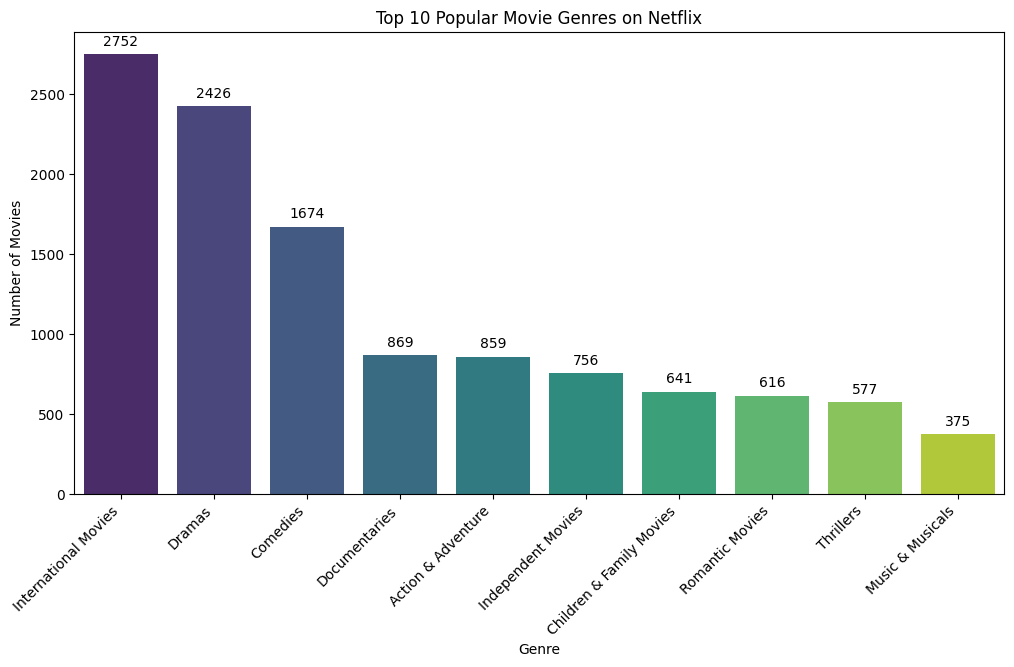

In [28]:
# Filter for movies only
movies_df = df[df['type'] == 'Movie']

# Split genres and count occurrences
genre_counts = movies_df['category'].str.split(',').explode().str.strip().value_counts()

# Get the top 10 genres
top_10_genres = genre_counts.head(10)

# Display the result
print("Top 10 Popular Movie Genres:")
print(top_10_genres)

# Create a bar plot for better visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")
plt.title('Top 10 Popular Movie Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# Iterate through the patches (bars) and annotate with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

“Top 10 Popular Movie Genres on Netflix” shows the number of movies available in each genre on Netflix.

Key Points:
* International Movies, This genre has the highest number of movies, with 2752 titles. This indicates a strong presence of global content on Netflix.
* Music & Musicals has the least representation among the top ten, with 375 titles, but still offers a variety of musical content for enthusiasts.
Insights:
* Diverse Content: The chart shows a wide range of genres, indicating Netflix’s strategy to cater to various tastes and preferences.
* Global Reach: The high number of International Movies suggests that Netflix is focusing on a global audience, offering content from different cultures and regions.
* Family-Friendly Content: The presence of a significant number of Children & Family Movies highlights Netflix’s commitment to providing content suitable for all age groups.

This chart provides a clear visual representation of the most popular movie genres on Netflix, reflecting viewer preferences and Netflix’s content acquisition strategy.


##**Top 10 TV Shows Genres**

Top 10 Popular TV Show Genres:
category
International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: count, dtype: int64


<ipython-input-29-9b77da0c9783>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")


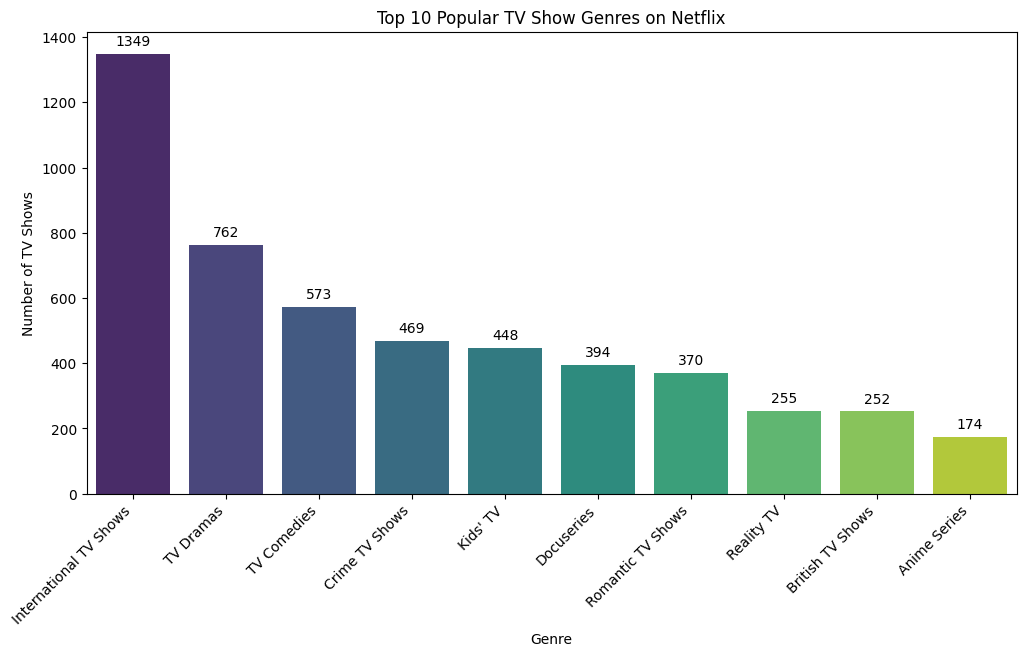

In [29]:
# Filter for TV Shows only
tvshows_df = df[df['type'] == 'TV Show']

# Split genres and count occurrences
genre_counts = tvshows_df['category'].str.split(',').explode().str.strip().value_counts()

# Get the top 10 genres
top_10_genres = genre_counts.head(10)

# Display the result
print("Top 10 Popular TV Show Genres:")
print(top_10_genres)

# Create a bar plot for better visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")
plt.title('Top 10 Popular TV Show Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# Iterate through the patches (bars) and annotate with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

“Top 10 Popular TV Show Genres on Netflix” provides a visual representation of the most popular TV show genres on Netflix based on the number of shows available in each genre.

* International TV Shows is the most popular, with 1349 shows. It indicates a high demand for TV shows from various countries, reflecting Netflix’s global audience.
* Anime Series has 174 shows, making it the least popular among the top ten but still significant, especially for fans of animated content.

Overall, the chart highlights the diverse range of genres available on Netflix and the varying levels of popularity among them. This information can be useful for understanding viewer preferences and guiding content strategy.


##**Top 10 Directors with High Frequency of Movies and Shows**

Top 10 Directors with High Frequency of Movies and Shows:
director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Name: count, dtype: int64


<ipython-input-30-db76a9d3cca3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette="viridis")


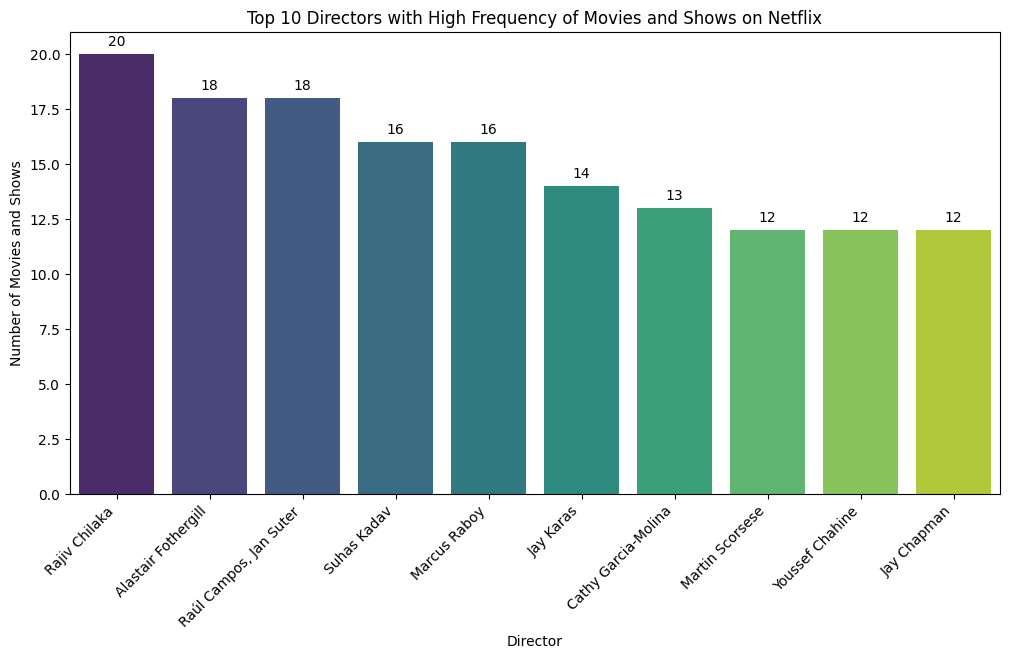

In [30]:
# Extract directors, split multiple directors, and count occurrences
director_counts = df['director'].value_counts()[1:11]

# Get the top 15 directors
top_10_directors = director_counts.head(10)

# Display the result
print("Top 10 Directors with High Frequency of Movies and Shows:")
print(top_10_directors)

# Create a bar plot for better visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette="viridis")
plt.title('Top 10 Directors with High Frequency of Movies and Shows on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Movies and Shows')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

“Top 10 Directors with High Frequency of Movies and Shows on Netflix” shows the number of movies and shows available on Netflix for each director.

* Rajiv Chilaka has the highest number of movies and shows, with over 20 titles.
* Alastair Fothergill and Raúl Campos, Jan Suter has the second highest number of movies and shows of 18 titles each.
* Martin Scorsese, Yousuf Chahine and Jay Chapman are also among the top 10 directors, with 12 titles each which is the least among top 10.

This chart highlights which directors have the most content available on Netflix, making it easier for viewers to explore works by prolific directors.

##**The Most Common Rating for Movies and TV Shows**

In [31]:
# Calculate most common rating and count for movies
movie_mode = df[df['type'] == 'Movie']['rating'].mode()[0]
movie_count = df[df['type'] == 'Movie']['rating'].value_counts()[movie_mode]

# Calculate most common rating and count for TV shows
tvshow_mode = df[df['type'] == 'TV Show']['rating'].mode()[0]
tvshow_count = df[df['type'] == 'TV Show']['rating'].value_counts()[tvshow_mode]

# Create a DataFrame for the table
data = {'Content Type': ['Movie', 'TV Show'],
        'Most Common Rating': [movie_mode, tvshow_mode],
        'Count': [movie_count, tvshow_count]}
table = pd.DataFrame(data)

# Display the table
table

,Content Type,Most Common Rating,Count
0,Movie,TV-MA,2062
1,TV Show,TV-MA,1143


The table provides information about the most common ratings for movies and TV shows on Netflix, along with their counts. Here are the key points:

* Content Type: This column indicates whether the content is a movie or a TV show.
* Most Common Rating: This column shows the most frequent rating given to the content type. In this case, both movies and TV shows have the rating TV-MA.
* Count: This column lists the number of titles with the most common rating. There are 2062 movies and 1143 TV shows rated TV-MA.

This table helps to understand the distribution of content ratings on Netflix, specifically highlighting the prevalence of TV-MA rated movies and TV shows.

##**The Distribution of Release Years for Movies and TV Shows**

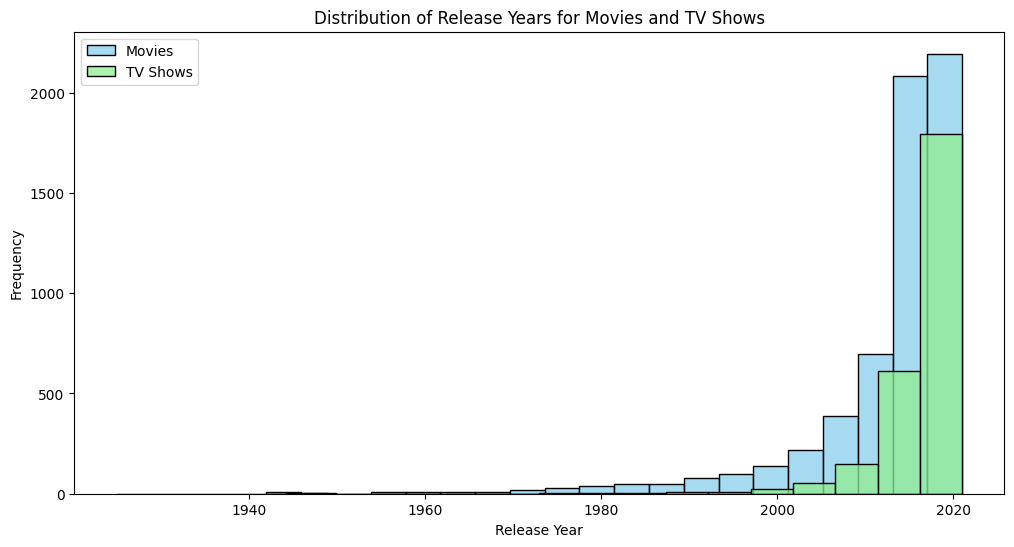

In [32]:
# Create histograms for release years
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['type'] == 'Movie'], x='release_year', bins=20, color='skyblue', label='Movies')
sns.histplot(data=df[df['type'] == 'TV Show'], x='release_year', bins=20, color='lightgreen', label='TV Shows')
plt.title('Distribution of Release Years for Movies and TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()

"Distribution of Release Years for Movies and TV Shows", shows how many movies and TV shows were released each year.

* Trend: The number of releases for both movies and TV shows increases over time, with a significant rise starting around the year 2000.
* Recent Years: From around 2010 onwards, the frequency of TV shows begins to match almost that of movies.

This chart highlights the growing trend in content production, especially in recent decades.

##**Distribution of Content Types (Movies vs. TV Shows) for the Top Directors with the Most Content**

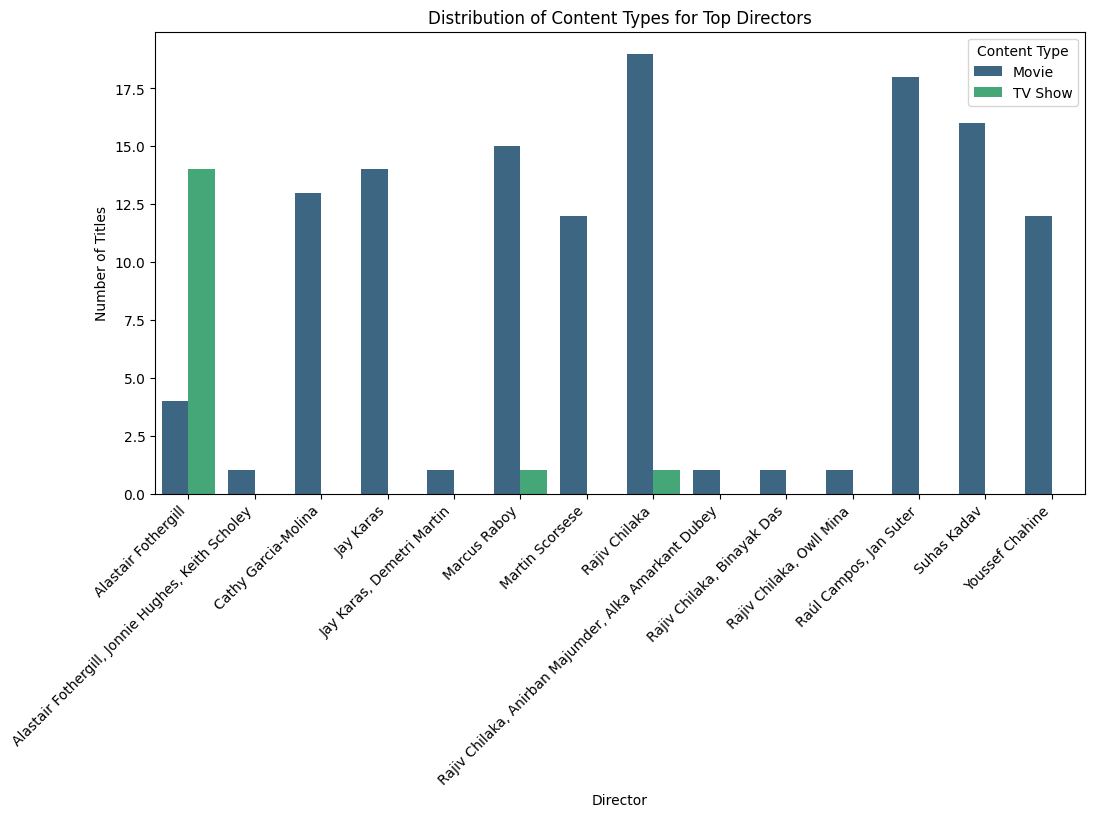

In [33]:
# Get top 10 directors with the most content
top_directors = df['director'].value_counts()[1:10]
top_10_directors = top_directors.head(10)

# Filter data for top directors and group by director and type
# Convert top_10_directors' index (director names) to a list of strings
top_directors_content = df[df['director'].str.contains('|'.join(top_10_directors.index.astype(str)), na=False)]
content_distribution = top_directors_content.groupby(['director', 'type'])['type'].count().reset_index(name='Count')

# Create a bar plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=content_distribution, x='director', y='Count', hue='type', palette='viridis')
plt.title('Distribution of Content Types for Top Directors')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.show()

“Distribution of Content Types for Top Directors” shows the number of movies and TV shows directed by various top directors.

* Rajiv Chilaka has directed the most content, with a significant number of both movies and TV shows.
* Most of the direcors have directed more movies than TV shows.
* Alastair Fothergill, Rajiv Chilaka and Marcus Raboy are the directors that have directed both movies and TV shows.
* Alastair Fothergill have directed highest number of TV shows and directed more TV shows than movies.

This chart provides a clear comparison of the output of various directors in terms of movies and TV shows, highlighting their versatility and focus areas.